In [1]:
# Download dependencies here


In [10]:
# Importing the libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
pd.set_option('display.max_columns', None)  

In [12]:
%store -r df

In [13]:
X = df.drop(columns=['Overall'])
y = df['Overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
regressor = DecisionTreeRegressor(random_state = 42, max_depth=10)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [15]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Root Mean Squared Error: 0.17877009844742736
R-squared: 0.9143945867951639


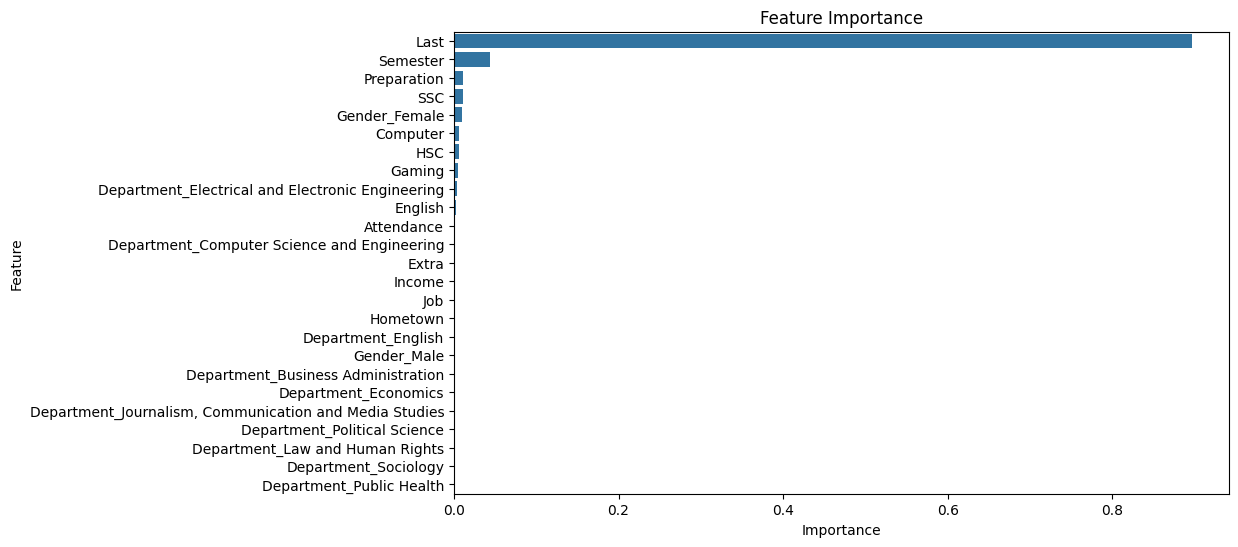

In [18]:
importances = regressor.feature_importances_

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({
    'Feature': X_test.columns.tolist(),
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()